In [1]:
import matplotlib.pyplot as plt 
import matplotlib.ticker as mtick
import pandas as pd 

In [2]:
# Results of calls to evaluation.py
# just hard-coding them here for simplicity:
num_steps = [30,30,50,50,100,100]
labels = ['BLine', 'Meander'] * 3

cardiff_orig = [-3.47, 	-5.64, 	-6.41, 	-8.69, 	-13.76, -16.6]
ours_orig = [-3.582, -6.247, -6.588999, -9.860999, -14.08799999, -16.936]

cardiff_ablation = [-3.8829, -8.396, -5.948, -53.071, -22.45, -345.777]
ours_ablation = [-1.706, -5.927, -3.233, -9.155, -6.645, -17.242]

df = pd.DataFrame({
    'cardiff': cardiff_orig, 'ours': ours_orig,
    'cardiff_ablation': cardiff_ablation, 'ours_ablation': ours_ablation,
    'steps': num_steps, 'labels': labels                    
})
df

,cardiff,ours,cardiff_ablation,ours_ablation,steps,labels
0,-3.47,-3.582000,-3.8829,-1.706,30,BLine
1,-5.64,-6.247000,-8.3960,-5.927,30,Meander
2,-6.41,-6.588999,-5.9480,-3.233,50,BLine
3,-8.69,-9.860999,-53.0710,-9.155,50,Meander
4,-13.76,-14.088000,-22.4500,-6.645,100,BLine
5,-16.60,-16.936000,-345.7770,-17.242,100,Meander


In [3]:
df['Ours (% change)'] = ((df['ours_ablation'] - df['ours'])/df['ours']) * 100
df['Cardiff (% change)'] = ((df['cardiff_ablation'] - df['cardiff']) / df['cardiff']) * 100
df

,cardiff,ours,cardiff_ablation,ours_ablation,steps,labels,Ours (% change),Cardiff (% change)
0,-3.47,-3.582000,-3.8829,-1.706,30,BLine,-52.372976,11.899135
1,-5.64,-6.247000,-8.3960,-5.927,30,Meander,-5.122459,48.865248
2,-6.41,-6.588999,-5.9480,-3.233,50,BLine,-50.933366,-7.207488
3,-8.69,-9.860999,-53.0710,-9.155,50,Meander,-7.159508,510.713464
4,-13.76,-14.088000,-22.4500,-6.645,100,BLine,-52.832198,63.154070
5,-16.60,-16.936000,-345.7770,-17.242,100,Meander,1.806802,1982.993976


In [4]:
bline = df.iloc[::2]
bline.set_index('steps', inplace=True)
bline 

,cardiff,ours,cardiff_ablation,ours_ablation,labels,Ours (% change),Cardiff (% change)
steps,,,,,,,
30,-3.47,-3.582000,-3.8829,-1.706,BLine,-52.372976,11.899135
50,-6.41,-6.588999,-5.9480,-3.233,BLine,-50.933366,-7.207488
100,-13.76,-14.088000,-22.4500,-6.645,BLine,-52.832198,63.154070


In [5]:
meander = df.iloc[1::2]
meander.set_index('steps', inplace=True)
meander

,cardiff,ours,cardiff_ablation,ours_ablation,labels,Ours (% change),Cardiff (% change)
steps,,,,,,,
30,-5.64,-6.247000,-8.396,-5.927,Meander,-5.122459,48.865248
50,-8.69,-9.860999,-53.071,-9.155,Meander,-7.159508,510.713464
100,-16.60,-16.936000,-345.777,-17.242,Meander,1.806802,1982.993976


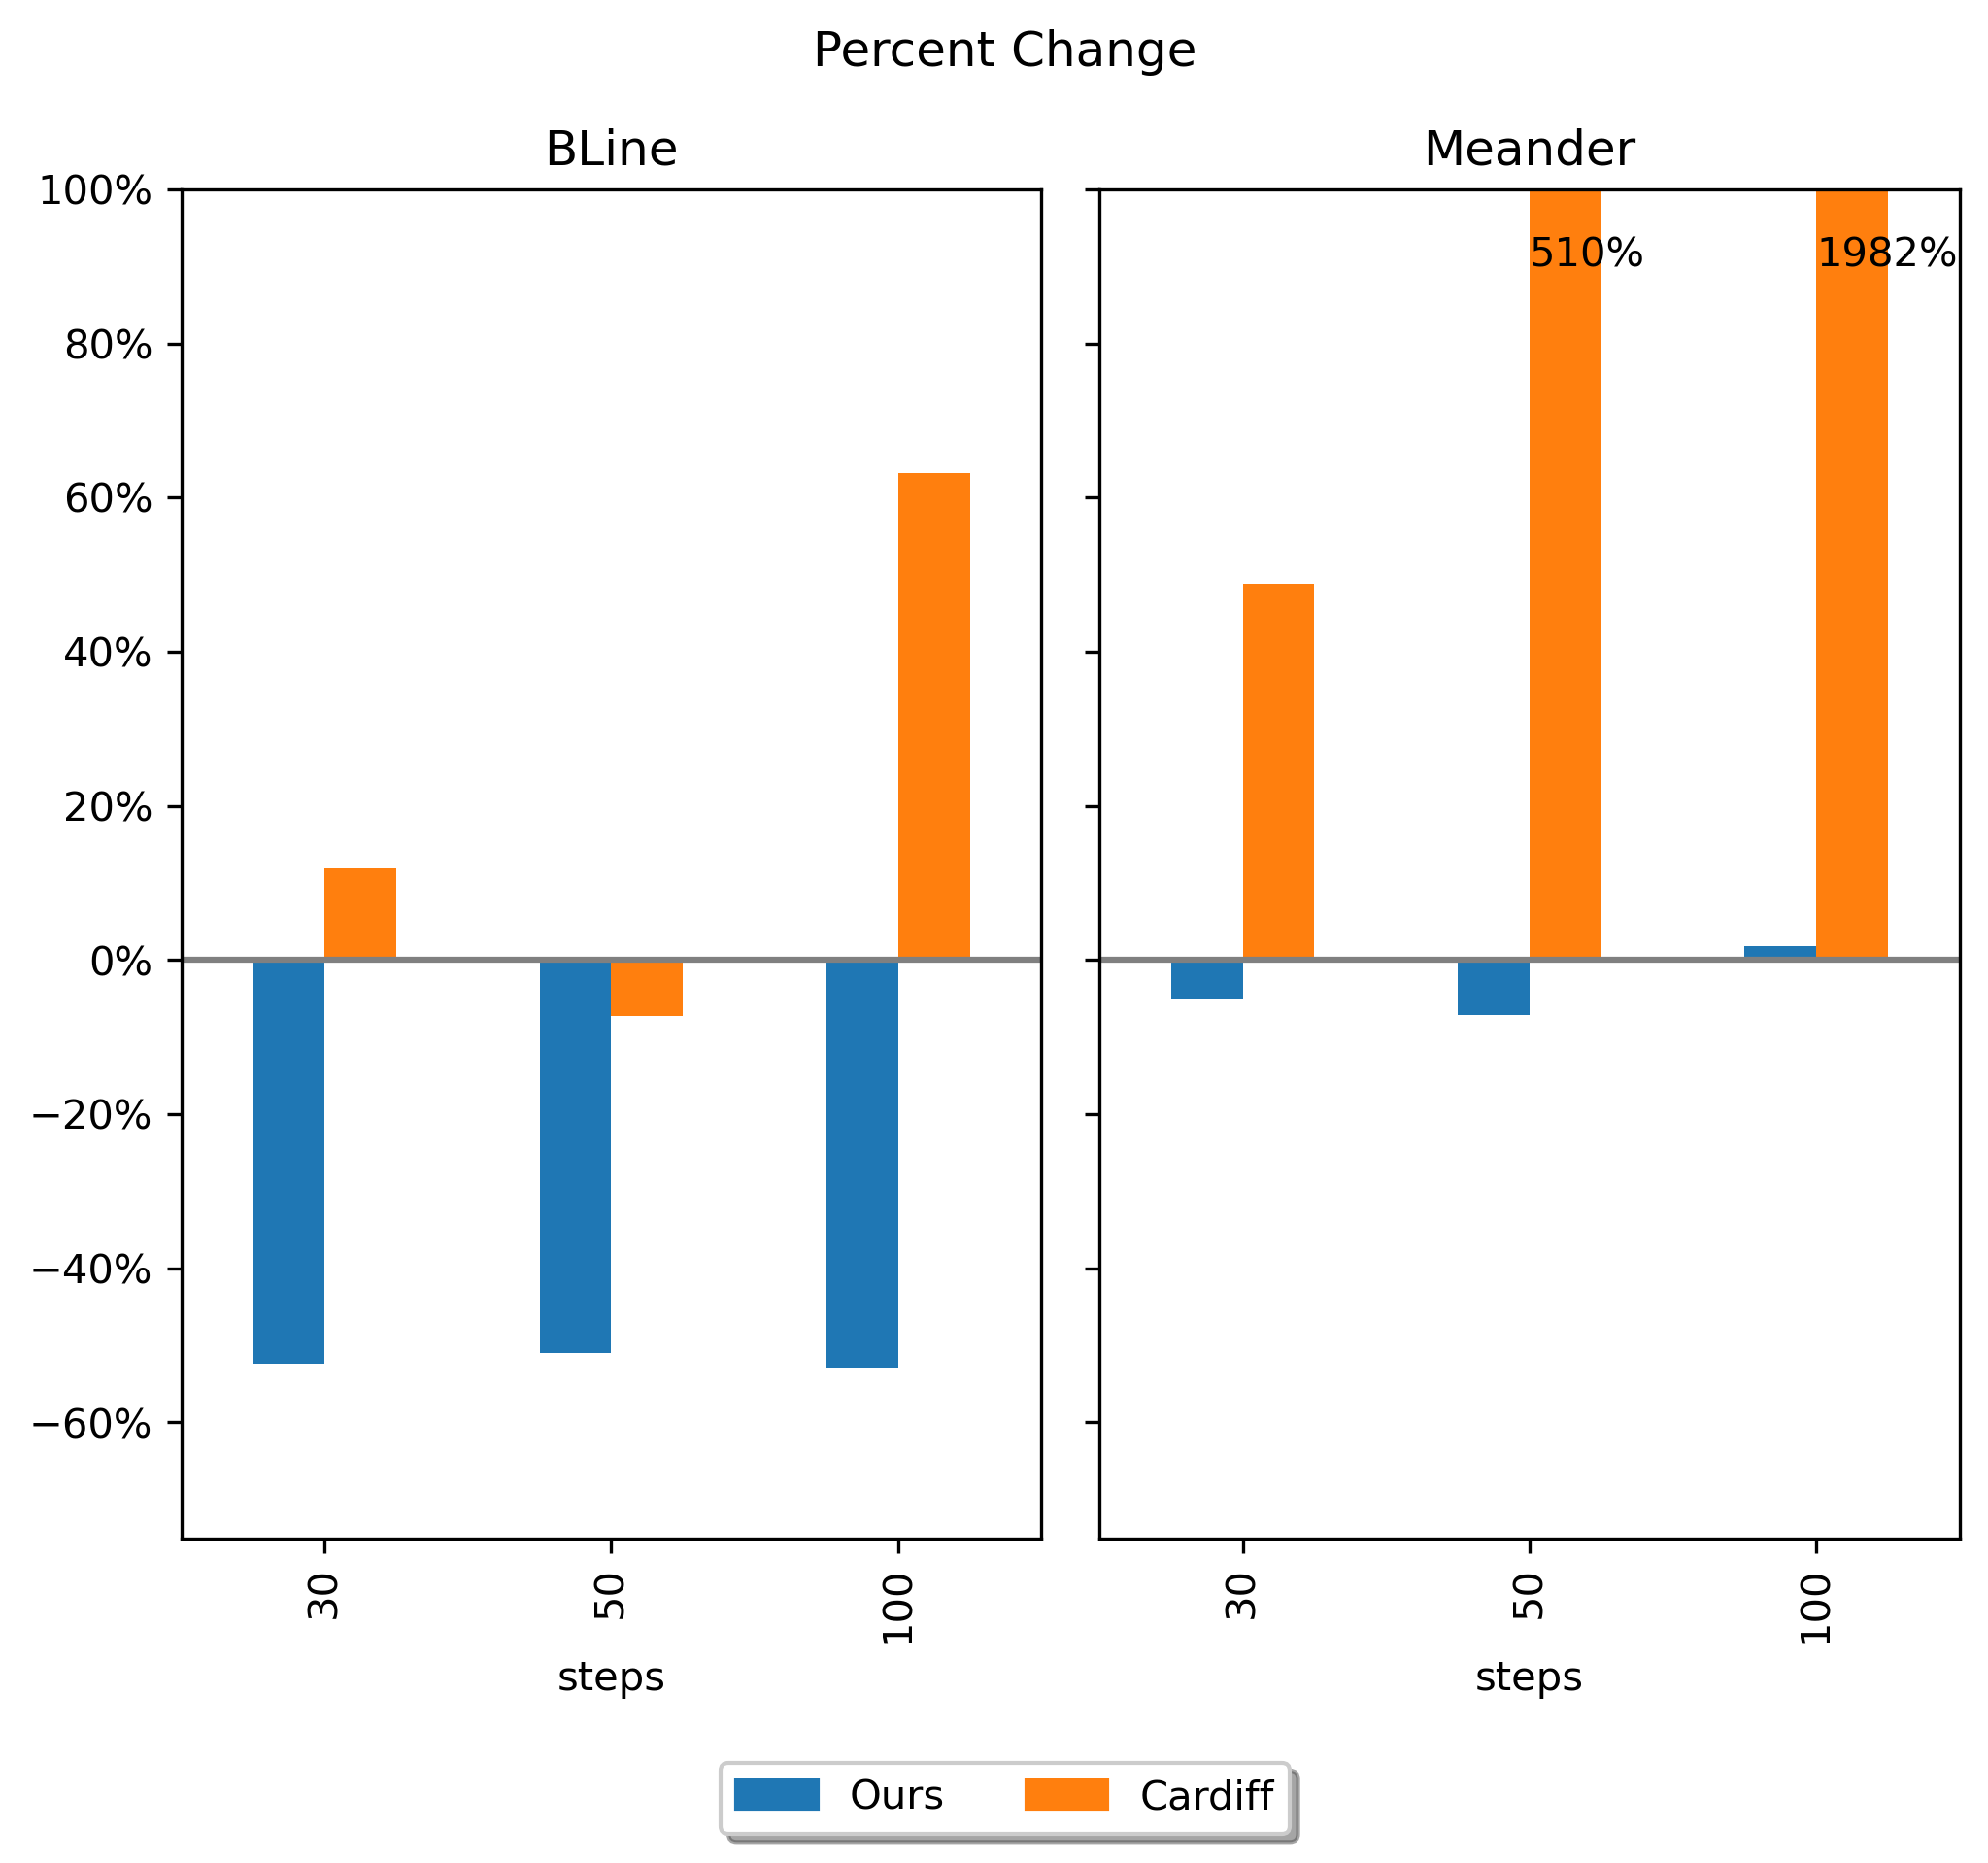

In [6]:

fig,ax = plt.subplots(1,2, sharey=True)
fig.set_size_inches(7,6)
fig.set_dpi(300)
plt.title('Percent change')
plt.ylim(-75,100)

ax[0].axhline(0, color='gray')
bline.plot.bar(y=['Ours (% change)', 'Cardiff (% change)'], ax=ax[0], legend=False)
ax[0].set_title('BLine')
ax[0].yaxis.set_major_formatter(mtick.PercentFormatter())

ax[1].axhline(0, color='gray')
meander.plot.bar(y=['Ours (% change)', 'Cardiff (% change)'], ax=ax[1], legend=False)
ax[1].text(1.0, 90, '510%')
ax[1].text(2.0, 90, '1982%')
ax[1].set_title('Meander')
ax[1].yaxis.set_major_formatter(mtick.PercentFormatter())

handles = [plt.Rectangle((0,0),1,1,color=f'C{i}') for i in range(2)]
fig.legend(handles=handles, labels=['Ours', 'Cardiff'], 
           loc='upper center', bbox_to_anchor=(0.5, 0),
            fancybox=True, shadow=True, ncol=2)

plt.suptitle('Percent Change')
plt.tight_layout()
plt.show()

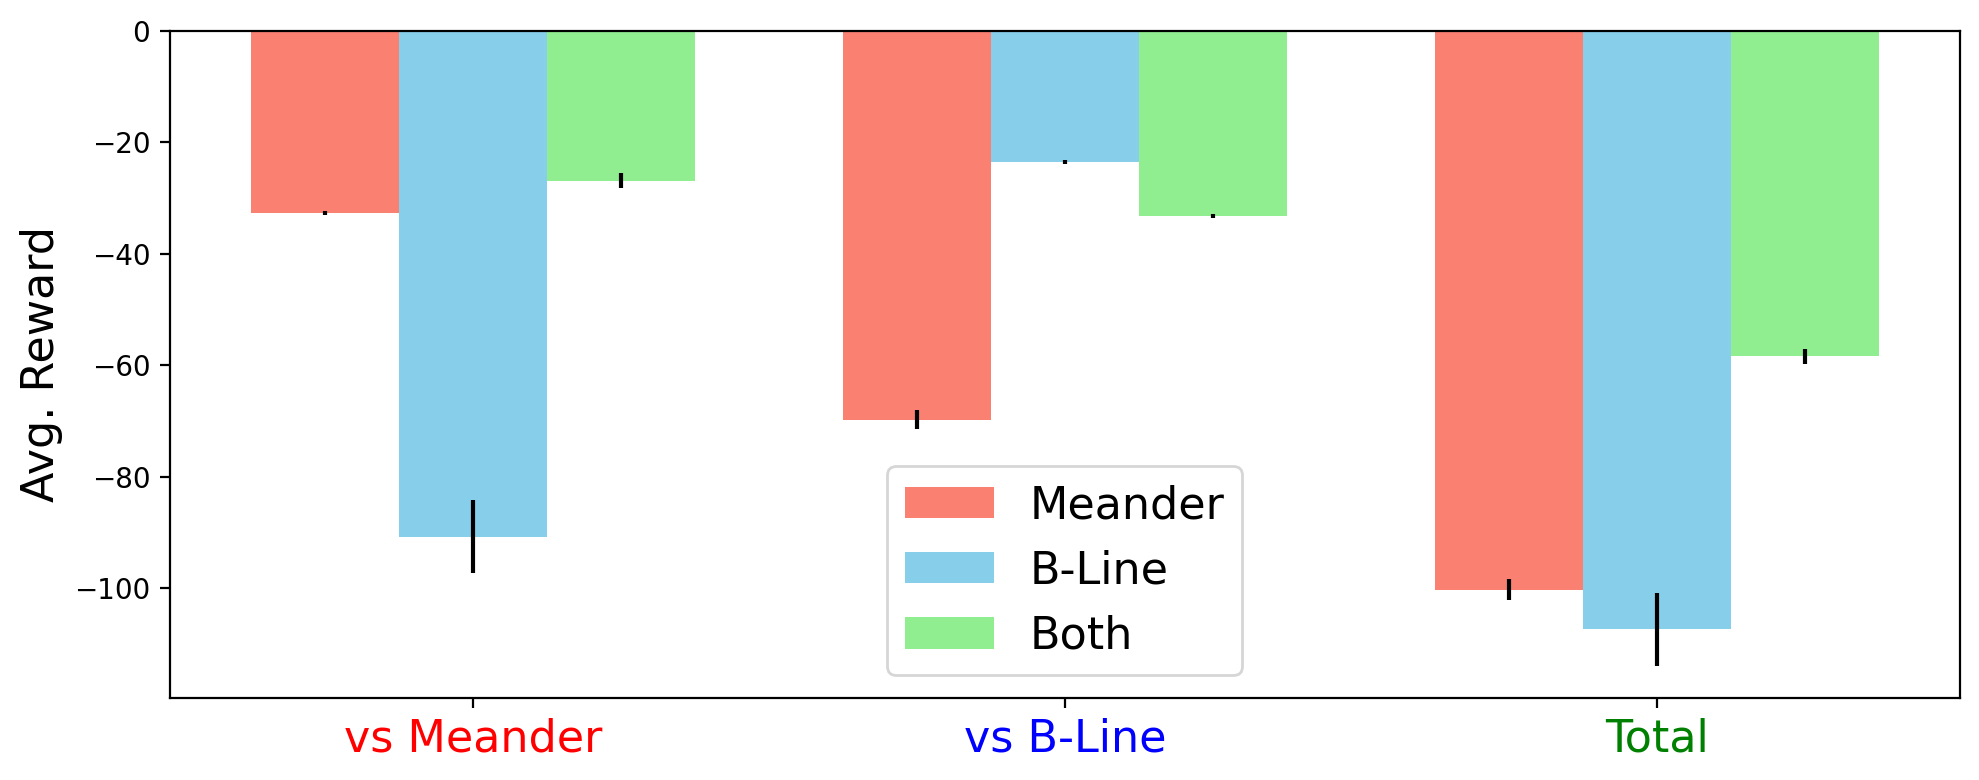

In [23]:
import pandas as pd 
import numpy as np 
from math import sqrt 

keys = ['agent', 'steps', 'reward', 'stderr']

bline = '''B_lineAgent,30,-3.6900000000000004,1.8006452266682706
RedMeanderAgent,30,-9.84,3.3940530284006996
B_lineAgent,50,-6.297999999999996,1.9395396725548388
RedMeanderAgent,50,-23.601000000000006,5.600423775451858
B_lineAgent,100,-13.57099999999998,2.9727481079182176
RedMeanderAgent,100,-57.381,65.12574580507057'''

meander = '''B_lineAgent,30,-10.450999999999999,2.2160796670943697
RedMeanderAgent,30,-6.412,1.6560437216694515
B_lineAgent,50,-16.926,3.7256853481113152
RedMeanderAgent,50,-9.646,1.8522397034919424
B_lineAgent,100,-42.387000000000015,17.063338069106113
RedMeanderAgent,100,-16.641,3.181578764441238'''

mapping = {'B_lineAgent': "B-Line", 'RedMeanderAgent': "Meander"}

def to_tuple(s): 
    rows = s.split('\n')
    m,b,merr,berr = [0,0,0,0]
    for r in rows: 
        cols = r.split(',')
        if cols[0].startswith('R'): 
            m += float(cols[2])
            merr += (float(cols[3])/10)**2
        else: 
            b += float(cols[2])
            berr += (float(cols[3])/10)**2

    return m,b,sqrt(merr),sqrt(berr)

def mag(x): 
    sq_sum = sum(x_i ** 2 for x_i in x)
    return sqrt(sq_sum)

bl = to_tuple(bline)
me = to_tuple(meander)
full = sum([-4.39, -7.68, -14.80 ]), sum([-6.99, -9.80, -16.48]), 1.338541265, 0.3590900944

# Organize into groups
vs_me = [me[0], bl[0], full[0]]
vs_bl = [me[1], bl[1], full[1]]
vs_both = [sum(me), sum(bl), sum(full)]
data = np.array([vs_me, vs_bl, vs_both])  # shape = (3 groups, 3 bars each)

vs_me_err = [me[2],bl[2],full[2]]
vs_bl_err = [me[3],bl[3],full[3]]
vs_both_err = [mag(me[2:]), mag(bl[2:]), mag(full[2:])]
errors = np.array([vs_me_err, vs_bl_err, vs_both_err])


labels = ['vs Meander', 'vs B-Line', 'Total']        # group labels
categories = ['Meander', 'B-Line', 'Both']
colors = ['salmon', 'skyblue', 'lightgreen']

x = np.arange(len(labels))      # positions for groups
width = 0.25                    # bar width

plt.figure(figsize=(10, 4), dpi=200)

# Plot each category
for i in range(data.shape[1]):  # loop over bf/me/full
    plt.bar(x + (i-1)*width, data[:, i], width,
            label=categories[i], color=colors[i],
            yerr=errors[:, i],)

# Formatting
plt.xticks(x, labels, size=16)
plt.ylabel("Avg. Reward", size=16)
plt.legend(fontsize=16)

xtick_colors = ['Red', 'Blue', 'green']  # match bf, me, full
for ticklabel, color in zip(plt.gca().get_xticklabels(), xtick_colors):
    ticklabel.set_color(color)

plt.tight_layout()
plt.show()